<a href="https://colab.research.google.com/github/ColeTKrause/MAT421/blob/main/ModuleB_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpolation Continued
### Python Numerical Methods Textbook Reference
link: https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.04-Lagrange-Polynomial-Interpolation.html


## Lagrange Polynomial Interpolation
### Section 17.4

Recall from section 17.3, a Cubic Polynomial Interpolation will find a different cubic polynomial equation between each data point in the set. Lagrange Polynomial Interpolation is very similar, however, lagrange finds a **single** polynomial equation that goes through each data point in the set. This is referred to as the Lagrange Polynomial and the formulation and mathematical symbols are shown below:\
\
**Lagrange Polynmials:** $P_i(x)=Π_{j=1,j\ne i}^n \frac{x-x_j}{x_i - x_j}$ \
\
**Lagrange Interpolation Function:** $L(x)=∑_{i=1}^n y_i P_i(x)$ \

### Example 1
Find the Lagrange Polynomials for x = [0, 1, 2] and y = [1, 3, 2]. \
\
$P_1(x)=\frac{(x - x_2)(x-x_3)}{(x_1 - x_2)(x_1 - x_3)}=\frac{(x-1)(x-2)}{(0-1)(0-2)}=0.5x^2-3x+2$\
\
$P_2(x)=\frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)}=\frac{(x-0)(x-2)}{(1-0)(1-2)}=-x^2+2x$ \
\
$P_3(x)=\frac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)}=\frac{(x-0)(x-1)}{(2-0)(2-1)}=0.5x^2-0.5x$ \
\
Notice the y vector which holds the coeffients increases in power from left to right. In other words index = 0 is $x^0$, index = 1 is $x^1$, and lastly index = 2 is $x^2$ coefficients.

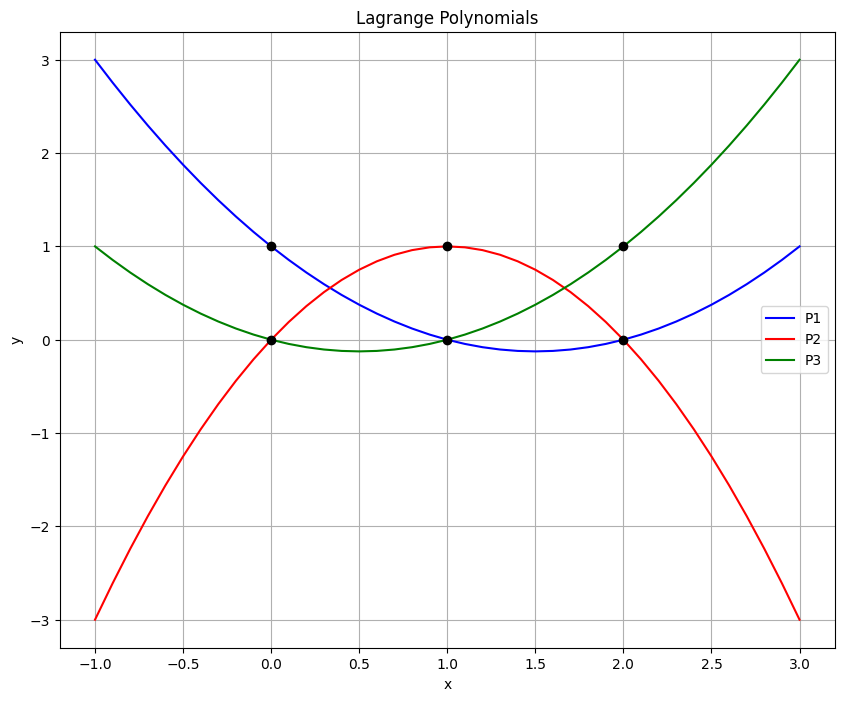

In [11]:
# Textbook Example

# Necessary imports
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

# plt.style.use('seaborn-poster') is now deprecated

# sample data
x = [0, 1, 2]
y = [1, 3, 2]
P1_coeff = [1, -1.5, 0.5]
P2_coeff = [0, 2, -1]
P3_coeff = [0, -0.5, 0.5]

# Lagrange Polynomials
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

# new x values from -1 to 3.0 in .1 increments
x_new = np.arange(-1.0, 3.1, 0.1)

# Polynomial plotting
fig = plt.figure(figsize=(10,8))
plt.plot(x_new, P1(x_new), 'b', label='P1')
plt.plot(x_new, P2(x_new), 'r', label='P2')
plt.plot(x_new, P3(x_new), 'g', label='P3')
plt.plot(x, np.ones(len(x)), 'ko', np.zeros(len(x)), 'ko')

# Figure labels
plt.title('Lagrange Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

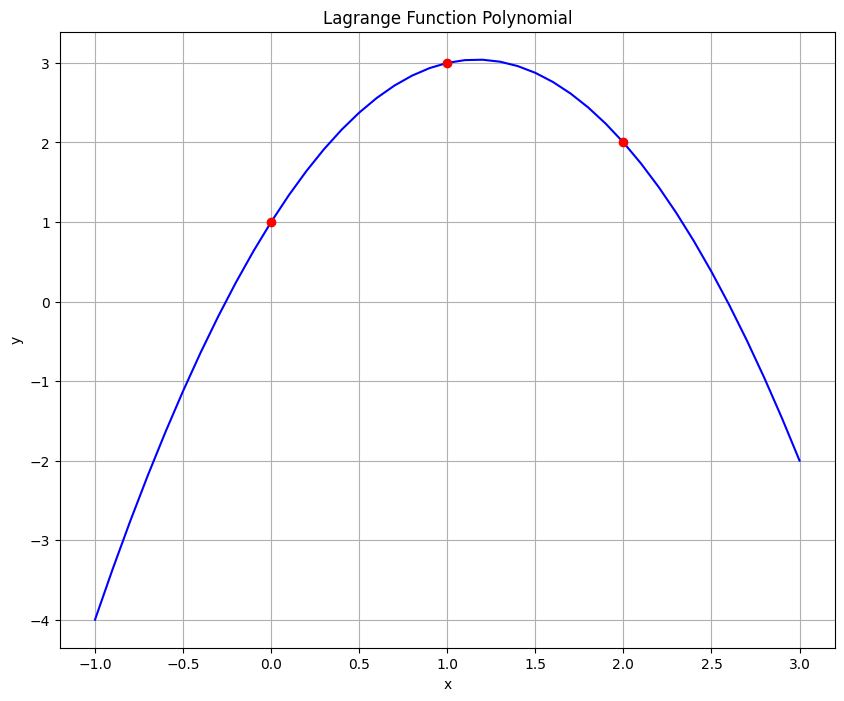

In [12]:
# Lagrange Function
L = P1 + 3*P2 + 2*P3

plt.clf()
fig = plt.figure(figsize=(10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Function Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<Figure size 640x480 with 0 Axes>

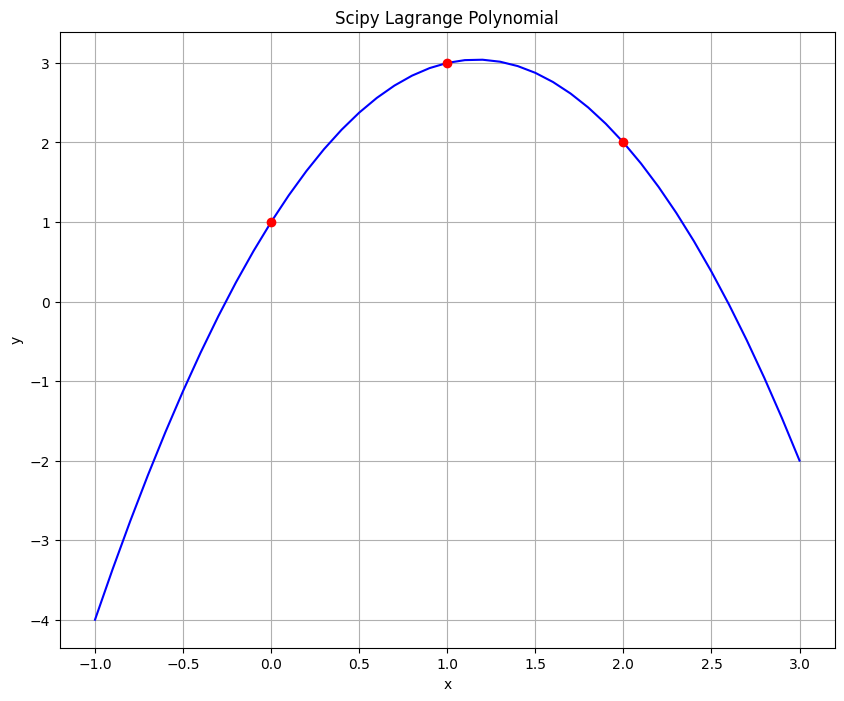

In [13]:
# Scipy Book Example
from scipy.interpolate import lagrange

# using same x and y data from above
f = lagrange(x,y)

# clear old plots and plot Scipy lagrange
plt.clf()
fig = plt.figure(figsize=(10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Scipy Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Newton's Polynomial Interpolation
### Section 17.5

Similar to Lagrange Interpolation, Newton's Polynomial Interpolation is another function that uses the given data points to create a **single** polynomial function that goes through each of the data points. Newton's Polynomial Interpolation method is popular due to the simplicity of computing the polynomials and the stability of the method on large datasets. While it appears to be very similar to Lagrange, there are much less errors that are magnified in computation such as floating point conversion, and limited number sizes based on underlying computer architecture which occur much more frequently in the Lagrange method. Let's observe the method below:\
\
**Newton's Polynomial:** $n_i(x)=Π_{j=0}^{i-1}(x-x_j)$\
\
**Newton's Polynomial Interpolation function:** $f(x)=∑_{i=0}^{i-1}a_in_i$


### Example 1
Calculate the divided differences table for x = [-5, -1, 0, 2] and y = [-2, 6, 1, 3]

In [15]:
# Textbook Example

# necessary imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 640x480 with 0 Axes>

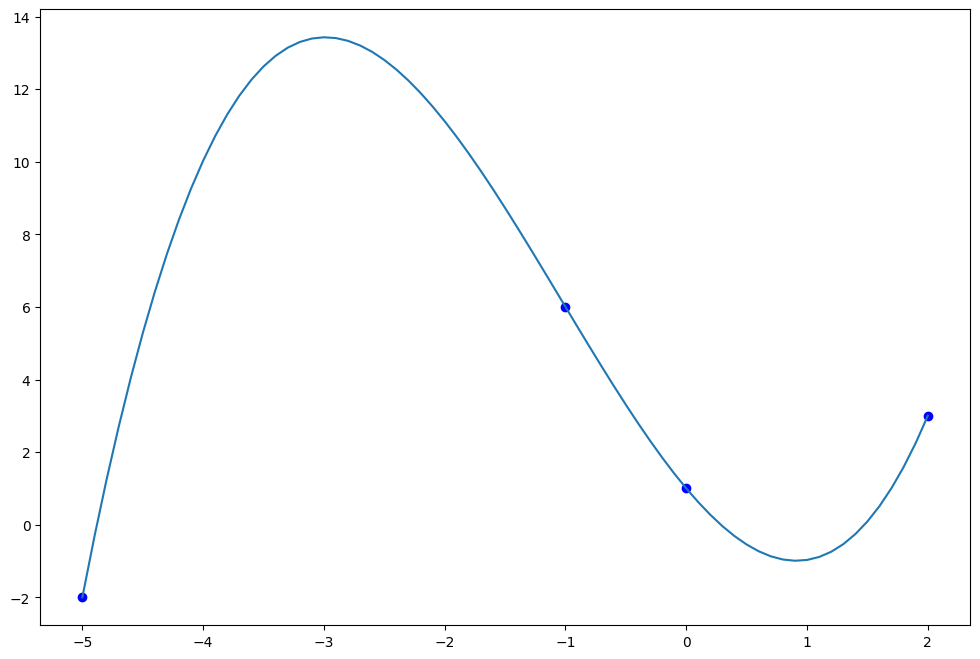

In [19]:
# Creating necessary functions to determine newton polynomial
def divided_diff(x,y):
  n = len(y)
  coef = np.zeros([n,n])
  coef[:,0] = y

  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

  return coef

def newton_poly(coef, x_data, x):
  n = len(x_data) - 1
  p = coef[n]
  for k in range(1, n+1):
    p = coef[n-k] + (x -x_data[n-k])*p

  return p


# Now apply to sample data
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])

# use newly defined function to get diveded difference coef
a_s = divided_diff(x,y)[0,:]

# evaluate new points, x from -5 to 2 in steps of .1
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

# plotting the results
plt.clf()
fig = plt.figure(figsize=(12,8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.show()